# <center>Text processing</center>



## Preprocessing ##

In [3]:
import pandas as pd
df = pd.read_csv('../data/data_with_text_langue.csv')
df['text_ocr'] = df['text']
df.head()

,Unnamed: 0.1,Unnamed: 0,filename,url,description,type,filepath,scraped,old_filename,old_filepath,height,width,channels,landscape,text,lang_code,lang_conf,text_ocr
0,0,0,img_0000000.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000000.jpg,1,img_0000000.jpg,./facture/img_0000000.jpg,1061.0,750.0,3.0,0.0,FACTURE LOGO Joanna Binet 48 Coubertin 31400 ...,fr,0.704567,FACTURE LOGO Joanna Binet 48 Coubertin 31400 ...
1,1,1,img_0000001.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000001.jpg,1,img_0000001.jpg,./facture/img_0000001.jpg,1061.0,750.0,3.0,0.0,Joanna Binet 48 Coubertin 31400 Paris FACTURE...,fr,0.798047,Joanna Binet 48 Coubertin 31400 Paris FACTURE...
2,2,2,img_0000002.jpg,https://www.coover.fr/wp-content/uploads/2021/...,Facture proforma : modèle à télécharger gratui...,facture,./final/img_0000002.jpg,1,img_0000002.jpg,./facture/img_0000002.jpg,1024.0,726.0,3.0,0.0,FACTURE Mon entreprise : Nom de la société Ad...,fr,0.985557,FACTURE Mon entreprise : Nom de la société Ad...
3,3,3,img_0000003.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000003.jpg,1,img_0000003.jpg,./facture/img_0000003.jpg,1061.0,750.0,3.0,0.0,Joanna Binet 48 Coubertin 31400 Paris FACTURE...,fr,0.738264,Joanna Binet 48 Coubertin 31400 Paris FACTURE...
4,4,4,img_0000004.jpg,https://files.intum.com/v/vosfactures/files/31...,Base de Connaissances - Vos Factures - Créer u...,facture,./final/img_0000004.jpg,1,img_0000004.jpg,./facture/img_0000004.jpg,771.0,773.0,3.0,1.0,Payer en ligne > FACTURE No SFIDELI F/05.2020...,fr,0.575626,Payer en ligne > FACTURE No SFIDELI F/05.2020...


In [4]:
import numpy as np
from nltk.corpus import stopwords
stop_words = {'en' : set(stopwords.words('english')),
              'fr':set(stopwords.words('french')),
              'it':set(stopwords.words('italian')),
              'de':set(stopwords.words('german')),
              'nl':set(stopwords.words('dutch')),
              'es':set(stopwords.words('spanish')),
              'pt':set(stopwords.words('portuguese'))
             }


from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-ZàâäèéêëîïôœùûüÿçÀÂÄÈÉÊËÎÏÔŒÙÛÜŸÇ]{4,}")

from nltk.tokenize import word_tokenize


def normalize_text(txt,lang_code):
    if(lang_code not in ['fr', 'it', 'de', 'nl', 'es', 'pt']):
        lang_code='en'
    result = []   
    txt = str(txt).lower()
    words = tokenizer.tokenize(txt)
    if len(words) > 0:
        for word in words:
            if word not in stop_words[lang_code]:
                result.append(word)
        return " ".join(result)
    else:
        return np.nan

df['text'] = df.apply(lambda x:normalize_text(x.text,x.lang_code), axis=1)
pd.set_option('display.max_colwidth', -1)
df[['text']].head(20)

C:\Users\dell\AppData\Local\Temp\ipykernel_20368\465081382.py:34: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,text
0,facture logo joanna binet coubertin paris facture cendrillon ayot nations paris envoye cendrillon ayot ferréol france facture date commande échéance prix unit total total montant designation grand brun escargot manger petit marinière uniforme bleu facile jouer accordéon buncht conditions modalités paiement paiement jours caisse epargne iban swift abcdfrp merci
1,joanna binet coubertin paris facture facturé cendrillon ayot nations paris envoyé cendrillon ayot ferréol france facture date commande echéance désignation prix unit montant grand brun escargot manger petit marinière uniforme bleu facile jouer accordéon total total bemohat conditions modalités paiement paiement jours caisse epargne iban swift abcdfrp
2,facture entreprise société adresse postale adresse mail téléphone facture date commande echéance facturé adresse envoyé adresse quantité désignation prix unitaire montant total total signature
3,joanna binet coubertin paris facture cendrillon ayot nations paris envoye cendrillon ayot ferréol france facture date commande échéance total facture designation prix unit montant grand brun escargot manger petit marinière unitorme bleu facile jouer accordéon total bunchat conditions modalites paiement paiement jours caisse epargne iban swift abcdfrp
4,payer ligne facture sfideli date création date limite validité vendeur fideli commerce paris france numéro info fideli telephone acheteur dupont paradis paris france travaux salle bain toilettes montant designation puht totalht totalttc devis service description service produit description produit devis service produit service produit total total description service description produit montant montant total
5,joanna binet coubertin paris facturé cendrillon ayot nations paris logo envoyé cendrillon ayot ferréol france désignation facture date commande échéance prix unit total montant grand brun escargot manger petit marinière uniforme bleu facile jouer accordéon total facture brunbnt conditions modalités paiement paiement jours caisse epargne iban swift abcdfrp
6,entreprise facture adresse ville province code postal tekephone defacture dave facturea client conditions paiement réception entreprise adresse ville province code postal deté téléphone adresse courriel deschoption frais service prix uniaire montant main ceuvre heures theure remise nouveauclient
7,ivotre societe choisir dato facture facturer client client adresse telephone vendeur wodalite paiement adresse iraison destinataire adresse teléphone dient entreprisel cient adressel vide pays code posta reephonel vendeurt modantel destinatare entreprise adresse pays code postal nreephonel date paiement choisir datel date vraison choisir datel mode ivraison mode lraison modalite irvraison modaiel total igne avant remise duantse darticle description prix unitaire remise total sous tares ventes total romercions confiance addresse code postal vilel adresse wobl reephonel relecopel adresse messagene societe
8,identification vendeur independant adresse modèle numéro siren numéro téléphone enregistré paris client client adresse client fidèle forme juridique numéro facture date désignation produits prestations quantité prix unitaire total conseil stratégie optimisation comptes facebook création annonces total montant total
9,facture joanna binet coubertin paris facture cendrillon ayot nations paris envoye cendrillon ayot ferréol france facture date commande echéance prix unit total total montant designation grand brun escargot manger petit marinière uniforme bleu facile jouer accordéon bradhedt conditions modalites paiement paiement jours caisse epargne iban swift abcdfrp


**Empty text**

In [5]:
df.isna().sum()

Unnamed: 0.1    0  
Unnamed: 0      0  
filename        0  
url             500
description     500
type            0  
filepath        0  
scraped         0  
old_filename    500
old_filepath    0  
height          0  
width           0  
channels        0  
landscape       0  
text            131
lang_code       0  
lang_conf       0  
text_ocr        41 
dtype: int64

⚠️ 153 images without any text ⚠️

img_0001355.jpg file_folder
Process img_0001355.jpg


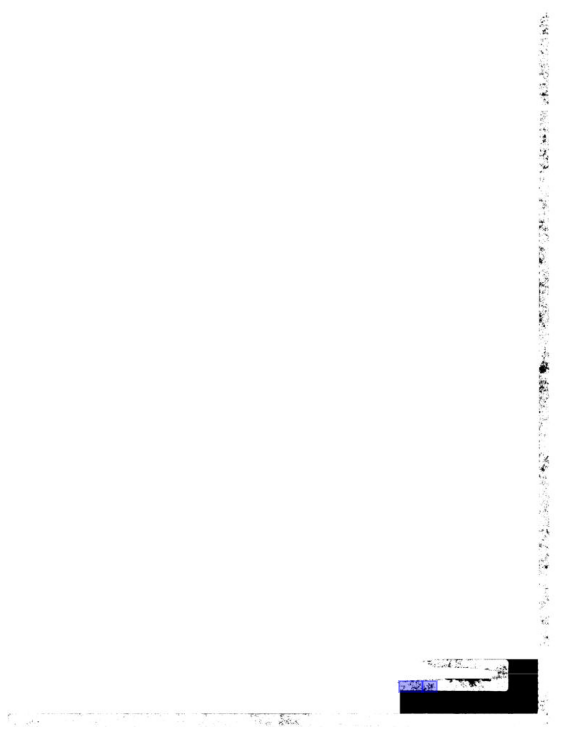

 2 E


In [6]:
from helpers import show_sample_image_ocr
show_sample_image_ocr(df[df['text'].isna()])

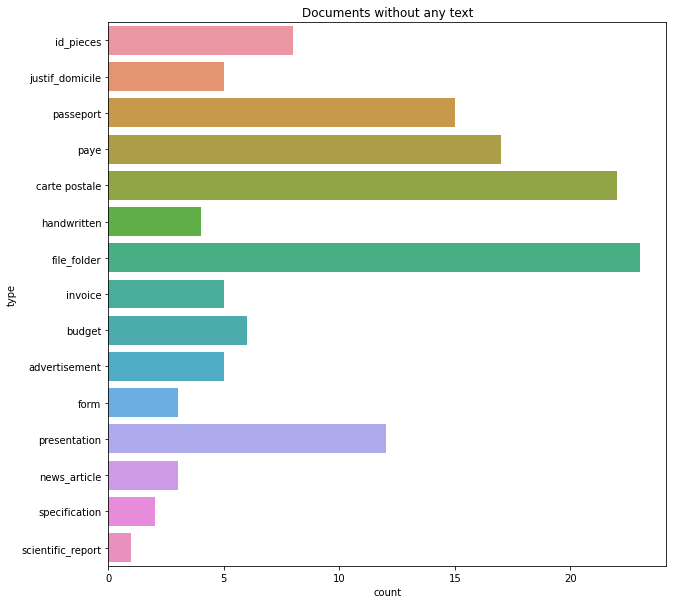

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
sns.countplot(y='type',data=df[df['text'].isna()])
plt.title('Documents without any text')
plt.show()

In [9]:
# df = df.dropna(subset = ['text'])

## Wordcloud ##

In [8]:
from wordcloud import WordCloud 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

def generate_word_cloud(lang_code): 
    text = ""
    for t in df[df['lang_code']==lang_code].text: 
        text += str(t)

    wc = WordCloud(background_color="black", stopwords=stop_words[lang_code], max_words=100, max_font_size=50, random_state=42)
    plt.figure(figsize= (10,6)) 
    wc.generate(text)          
    plt.imshow(wc) 
    plt.show()



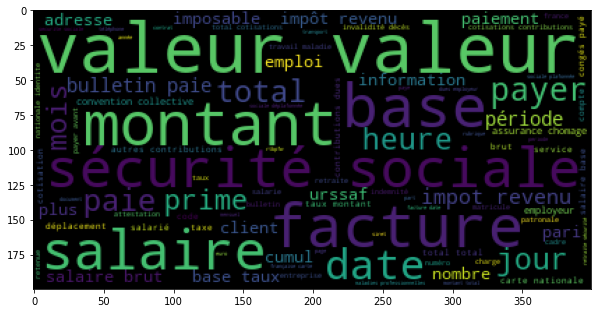

In [9]:
generate_word_cloud('fr')

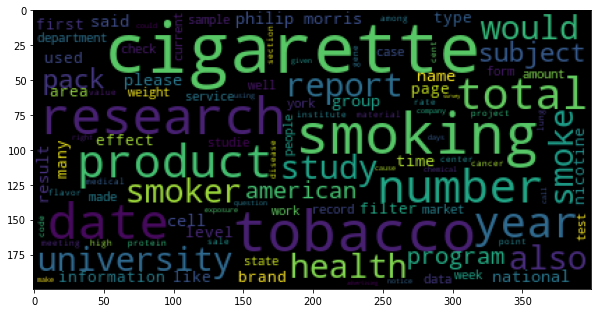

In [10]:
generate_word_cloud('en')

## Word histograme ##

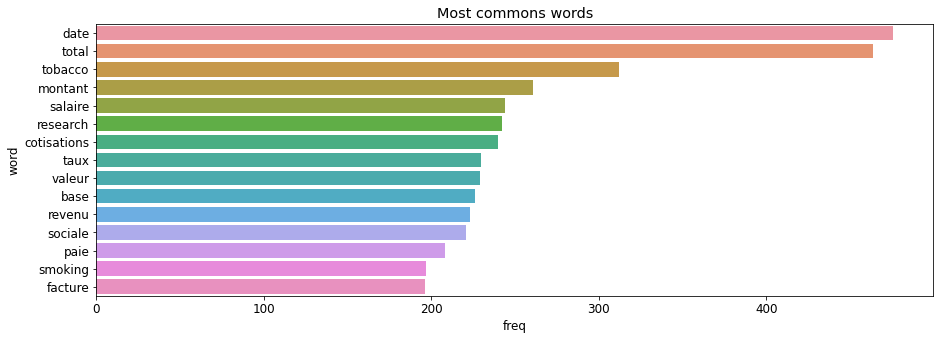

In [15]:
from collections import Counter
import seaborn as sns 

fig = plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 12})
all_text = ' '.join(str(i).lower() for i in df[df['text']!='']['text'])
dico = Counter(all_text.split())
data = {'word' : [m[0] for m in dico.most_common(15)],
                'freq' : [m[1] for m in dico.most_common(15)]}
word_df = pd.DataFrame(data)
sns.barplot(x=word_df.freq,y=word_df.word).set(title='Most commons words')
plt.show()     

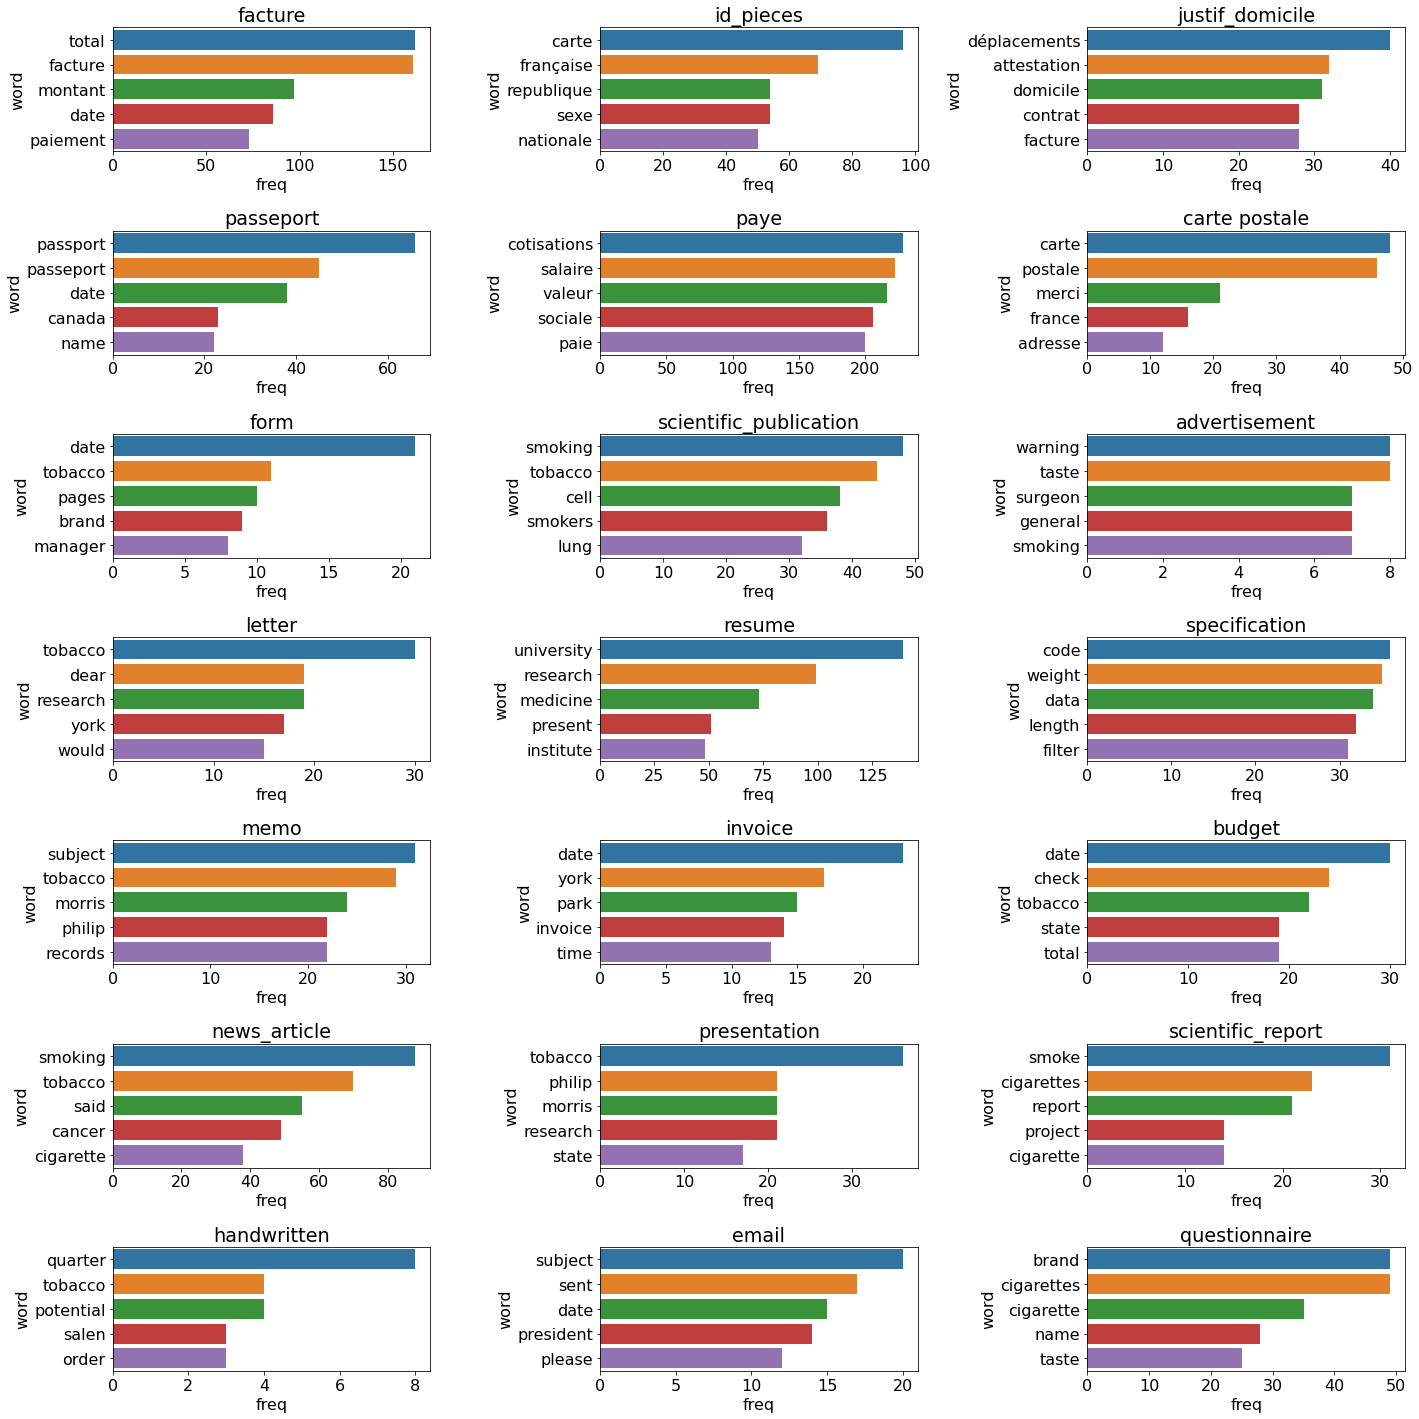

In [11]:
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(7, 3, figsize=(20,20))
r,c=0,0
for dtype in df['type'].unique():
    all_text = ' '.join(i.lower() for i in df[df['type']==dtype].text)
    dico = Counter(all_text.split())
    if (len(dico.most_common(10)) > 0):
        data = {'word' : [m[0] for m in dico.most_common(5)],
                'freq' : [m[1] for m in dico.most_common(5)],
                'type' : [dtype for m in dico.most_common(5)]}
        word_df = pd.DataFrame(data)
        sns.barplot(x=word_df.freq,y=word_df.word,ax = axs[r][c]).set(title='' + dtype)
        c+=1
        if(c==3):c=0;r+=1
plt.tight_layout() 
plt.show()

**Save dataframe for the next steps**

In [16]:
df.to_csv('../data/data_with_text_final.csv',index=False)